In [1]:
import matplotlib.pyplot as plt
import numpy as np

import rdkit
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit import DataStructs


#randomforestclassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('tested_molecules-1.csv')
smiles_good_inhibitor = df[df['ALDH1_inhibition'] == 1].reset_index()
smiles_bad_inhibitor = df[df['ALDH1_inhibition'] == 0].reset_index()

In [5]:
def plot_mol (smiles_df, molecule_index):
    smiles = smiles_df['SMILES'][molecule_index]
    mol =Chem.MolFromSmiles(smiles)
    Draw.MolToMPL(mol, size=(200, 200))


In [6]:
def plot_list_mol(smiles_df):
    mol_list = []
    for smiles in smiles_df:
        for smiles in smiles_df['SMILES']:    # assuming your column is called Smiles
            mol = Chem.MolFromSmiles(smiles)
            Chem.SanitizeMol(mol,sanitizeOps=Chem.SANITIZE_SYMMRINGS|Chem.SANITIZE_SETCONJUGATION|Chem.SANITIZE_SETHYBRIDIZATION)
            mol.Compute2DCoords()
            mol_list.append(mol)
            Draw.MolToMPL(mol, size=(200, 200))

In [16]:
data = df.copy(deep=True)
molecules = data.SMILES.apply(Chem.MolFromSmiles)
data.loc[:, 'MolLogP'] = molecules.apply(Descriptors.MolLogP)
data.loc[:, 'HeavyAtomCount'] = molecules.apply(Descriptors.HeavyAtomCount)
data.loc[:, 'HAccept'] = molecules.apply(Descriptors.NumHAcceptors)
data.loc[:, 'Heteroatoms'] = molecules.apply(Descriptors.NumHeteroatoms)
data.loc[:, 'HDonor'] = molecules.apply(Descriptors.NumHDonors)
data.loc[:, 'MolWt'] = molecules.apply(Descriptors.MolWt)
data.loc[:, 'RotableBonds'] = molecules.apply(Descriptors.NumRotatableBonds)
data.loc[:, 'RingCount'] = molecules.apply(Descriptors.RingCount)
data.loc[:, 'Ipc'] = molecules.apply(Descriptors.Ipc)
data.loc[:, 'HallKierAlpha'] = molecules.apply(Descriptors.HallKierAlpha)
data.loc[:, 'NumValenceElectrons'] = molecules.apply(Descriptors.NumValenceElectrons)
data.loc[:, 'SaturatedRings'] = molecules.apply(Descriptors.NumSaturatedRings)
data.loc[:, 'AliphaticRings'] = molecules.apply(Descriptors.NumAliphaticRings)
data.loc[:, 'AromaticRings'] = molecules.apply(Descriptors.NumAromaticRings)
data.loc[:, 'Heterocycles'] = molecules.apply(Descriptors.NumAromaticHeterocycles)
data.loc[:, 'AmideBonds'] = [AllChem.CalcNumAmideBonds(x) for x in molecules]
data.loc[:, 'LipinskiHBA'] = [AllChem.CalcNumLipinskiHBA(x) for x in molecules]
data.loc[:, 'LipinskiHBD'] = [AllChem.CalcNumLipinskiHBD(x) for x in molecules]
    

    
    
    
#Split data into Test data set and training data set before doing anything.
#X_train, X_test, y_train, y_test = train_test_split(data[features], data['ALDH1_inhibition'], stratify=data['ALDH1_inhibition'],test_size=0.25, random_state=42)

In [17]:
data

,SMILES,ALDH1_inhibition,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Heterocycles,AmideBonds,LipinskiHBA,LipinskiHBD
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,1.50330,34,8,10,2,463.542,8,4,6.958111e+07,-3.95,178,1,1,3,1,2,10,2
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,3.48110,27,6,7,1,378.457,7,4,3.137659e+06,-3.06,136,0,0,4,3,1,6,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,2.83782,35,8,9,2,477.589,9,5,1.436707e+08,-3.30,184,1,1,4,3,0,9,2
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,4.05510,18,3,5,0,330.609,3,2,1.207136e+04,-1.00,96,0,0,2,1,0,3,0
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,3.37490,27,6,9,1,419.553,5,4,1.948182e+06,-2.23,140,0,1,3,2,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0,0.05290,19,3,5,1,261.301,4,3,4.581294e+04,-1.88,100,2,2,1,0,2,5,2
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0,2.86550,19,5,5,1,257.293,5,2,2.727871e+04,-2.48,98,0,0,2,1,0,5,1
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0,1.03540,15,3,4,1,201.229,3,2,4.126498e+03,-2.10,76,0,0,2,1,1,4,2
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0,1.04182,27,10,11,1,392.441,5,3,1.115768e+06,-2.82,144,0,0,3,3,1,10,1


C:\Users\20213709\AppData\Local\Temp\ipykernel_22016\2661379471.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

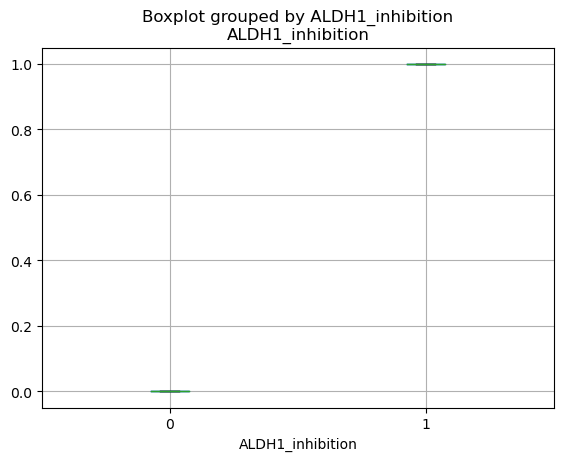

<Figure size 640x480 with 0 Axes>

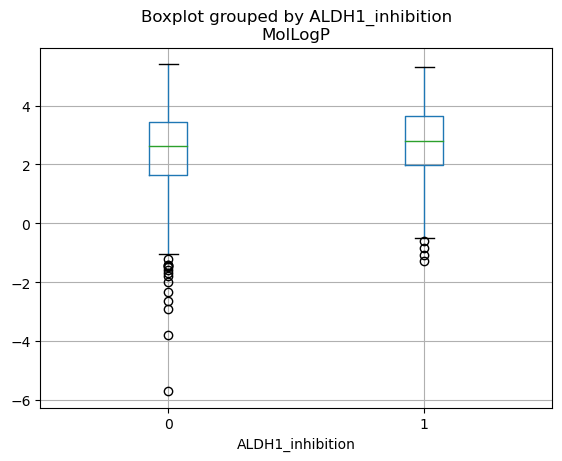

<Figure size 640x480 with 0 Axes>

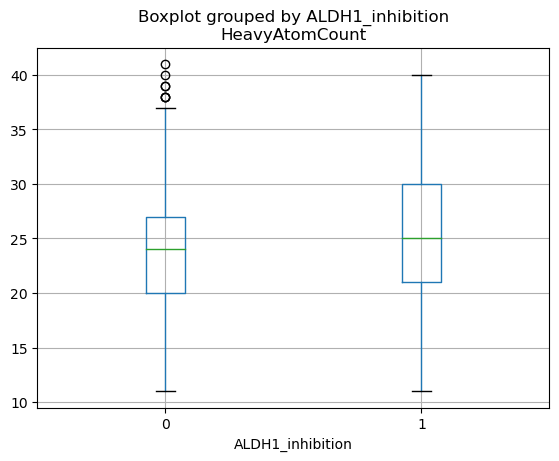

<Figure size 640x480 with 0 Axes>

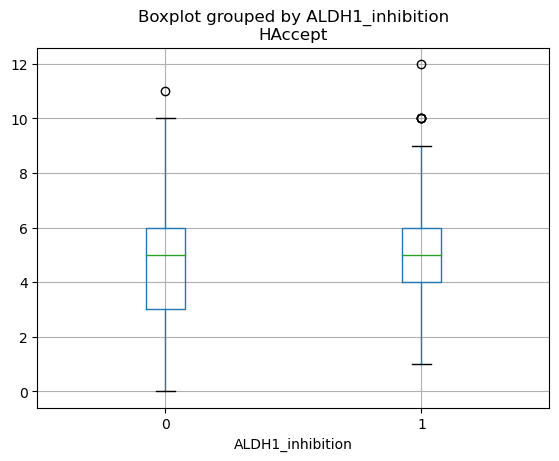

<Figure size 640x480 with 0 Axes>

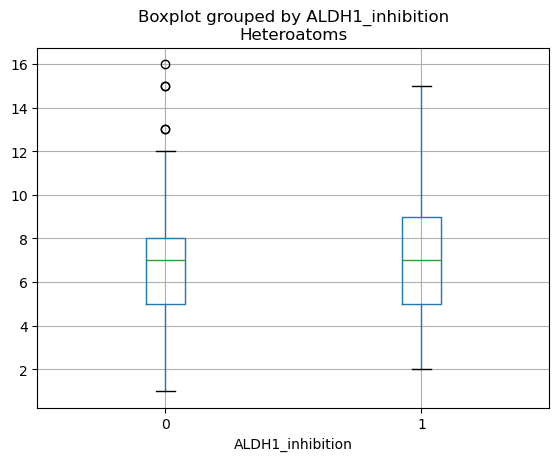

<Figure size 640x480 with 0 Axes>

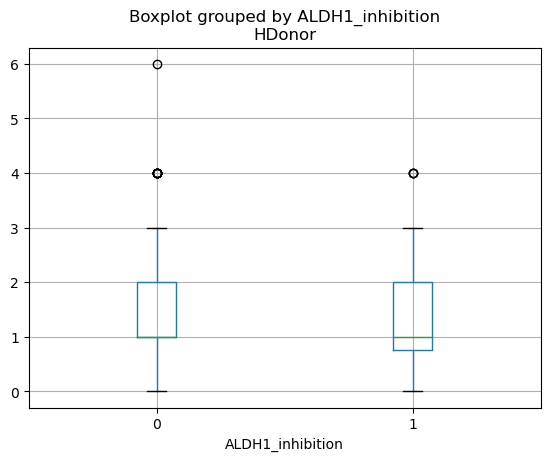

<Figure size 640x480 with 0 Axes>

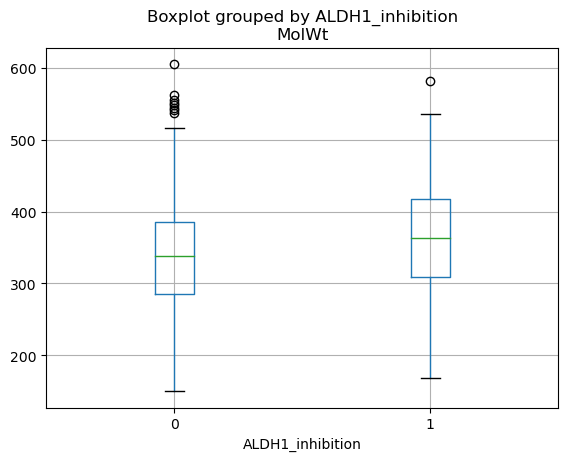

<Figure size 640x480 with 0 Axes>

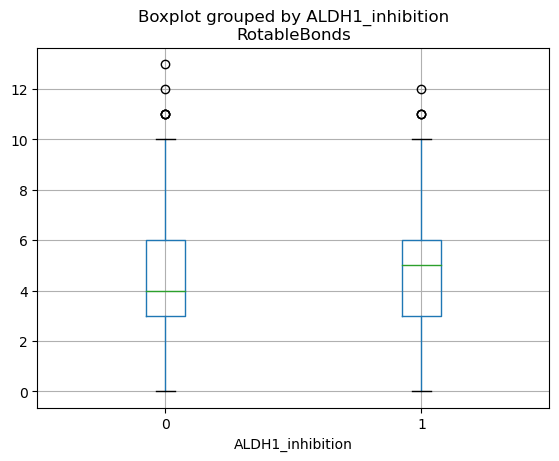

<Figure size 640x480 with 0 Axes>

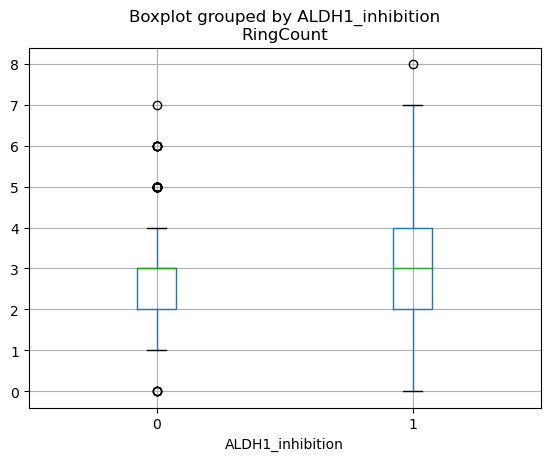

<Figure size 640x480 with 0 Axes>

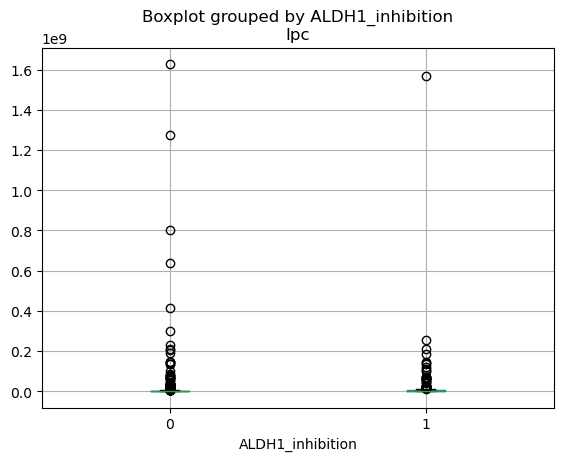

<Figure size 640x480 with 0 Axes>

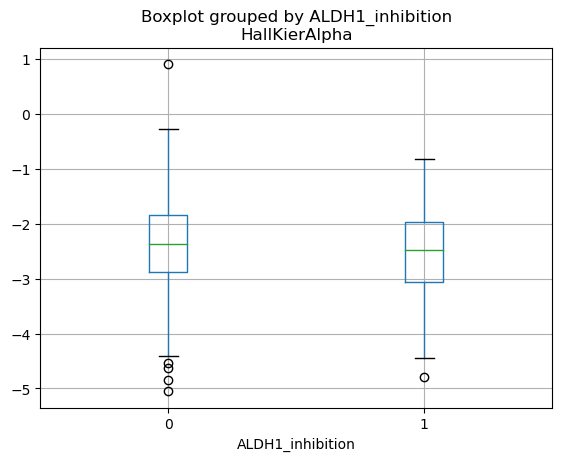

<Figure size 640x480 with 0 Axes>

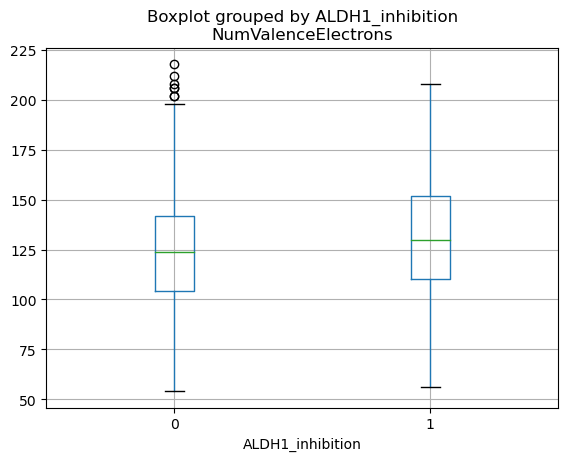

<Figure size 640x480 with 0 Axes>

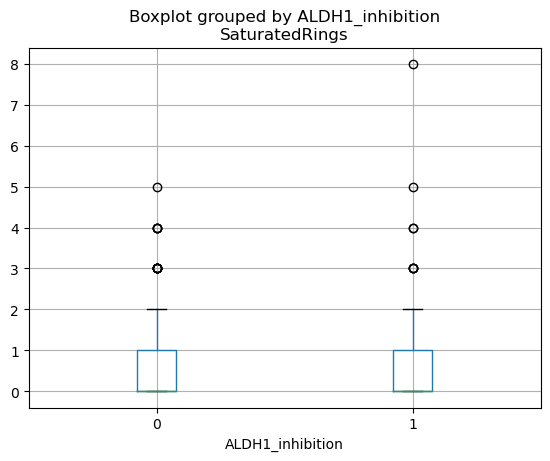

<Figure size 640x480 with 0 Axes>

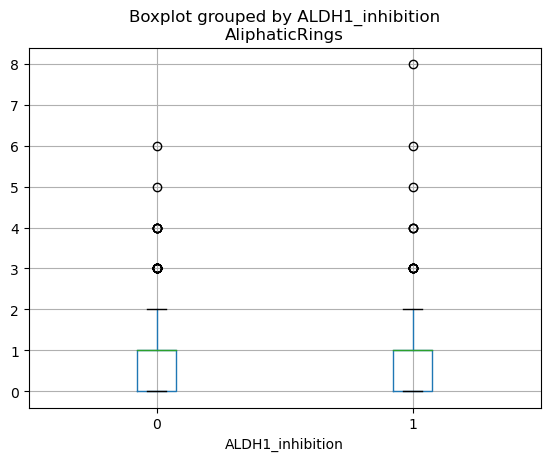

<Figure size 640x480 with 0 Axes>

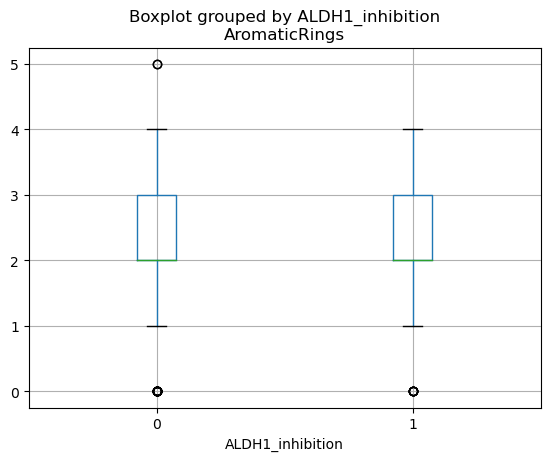

<Figure size 640x480 with 0 Axes>

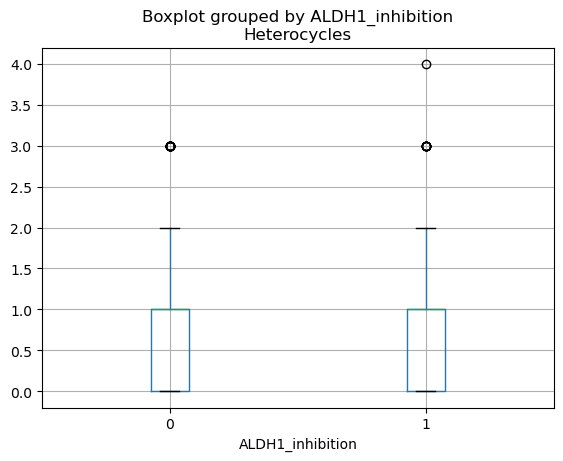

<Figure size 640x480 with 0 Axes>

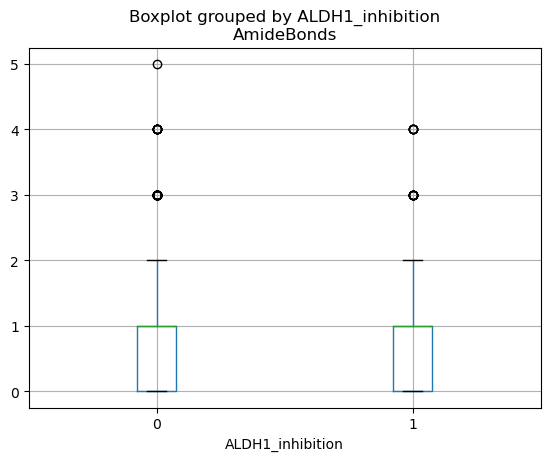

<Figure size 640x480 with 0 Axes>

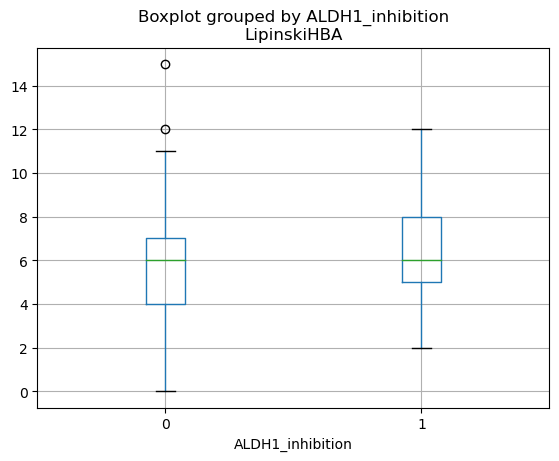

<Figure size 640x480 with 0 Axes>

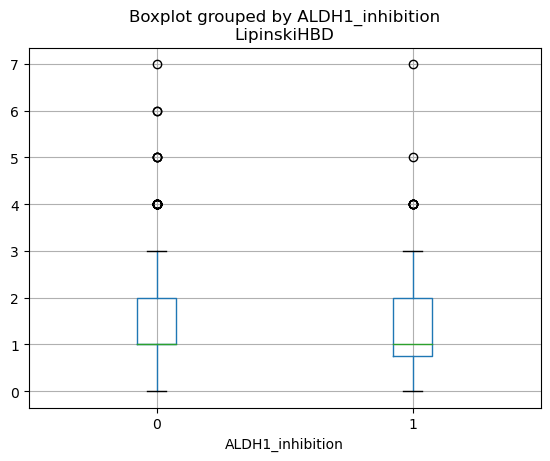

In [18]:
data_boxplot = data.select_dtypes(exclude=['object','string'])
for column in data_boxplot:
    plt.figure()
    data_boxplot.boxplot(by='ALDH1_inhibition',column= [column])